# Few Shot Trajectory Prediction

## Saving double pendulum video


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from scipy.integrate import solve_ivp
from IPython.display import HTML

# Ensure interactive plots in Jupyter Notebook
%matplotlib ipympl

def double_pendulum_derivatives(t, y, L1, L2, m1, m2):
    g = 9.81
    theta1, z1, theta2, z2 = y
    c, s = np.cos(theta1 - theta2), np.sin(theta1 - theta2)

    theta1_dot = z1
    theta2_dot = z2

    z1_dot = (m2 * g * np.sin(theta2) * c - m2 * s * (L1 * z1**2 * c + L2 * z2**2) -
              (m1 + m2) * g * np.sin(theta1)) / L1 / (m1 + m2 * s**2)
    z2_dot = ((m1 + m2) * (L1 * z1**2 * s - g * np.sin(theta2) + g * np.sin(theta1) * c) +
              m2 * L2 * z2**2 * s * c) / L2 / (m1 + m2 * s**2)

    return theta1_dot, z1_dot, theta2_dot, z2_dot

def plot_double_pendulum(L1, L2, m1, m2, theta1_0, theta2_0, t_max=10):
    y0 = [theta1_0, 0, theta2_0, 0]
    t_span = (0, t_max)
    t_eval = np.linspace(0, t_max, int(25*t_max))

    sol = solve_ivp(double_pendulum_derivatives, t_span, y0, t_eval=t_eval, args=(L1, L2, m1, m2))

    theta1, theta2 = sol.y[0], sol.y[2]

    x1 = L1 * np.sin(theta1)
    y1 = -L1 * np.cos(theta1)
    x2 = x1 + L2 * np.sin(theta2)
    y2 = y1 - L2 * np.cos(theta2)

    fig, ax = plt.subplots()
    ax.set_xlim(-L1 - L2 - 1, L1 + L2 + 1)
    ax.set_ylim(-L1 - L2 - 1, L1 + L2 + 1)

    line, = ax.plot([], [], 'o-', lw=2)
    trajectory, = ax.plot([], [], 'y-', lw=1)

    def init():
        line.set_data([], [])
        trajectory.set_data([], [])
        return line, trajectory

    def update(frame):
        thisx = [0, x1[frame], x2[frame]]
        thisy = [0, y1[frame], y2[frame]]

        line.set_data(thisx, thisy)
        trajectory.set_data(x2[:frame], y2[:frame])
        return line, trajectory,

    anim = FuncAnimation(fig, update, frames=len(t_eval), init_func=init, blit=True, interval=400)
    anim.save('double_pendulum_trajectory.gif', writer='imagemagick', fps=15)

MovieWriter imagemagick unavailable; using Pillow instead.


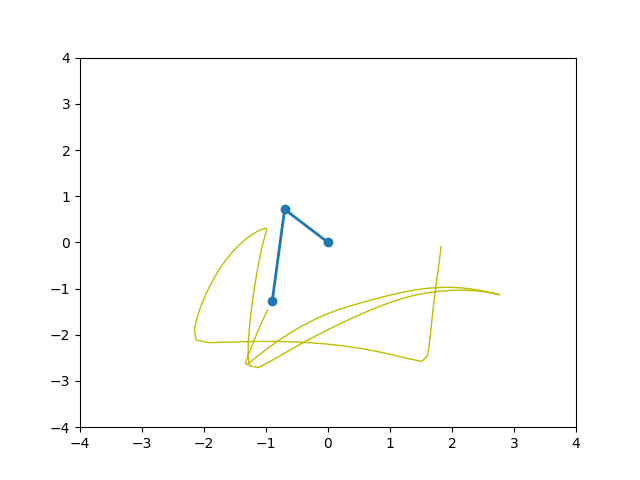

In [2]:
L1 = 1  # Length of first pendulum
L2 = 2  # Length of second pendulum
m1 = 1  # Mass of first pendulum
m2 = 4  # Mass of second pendulum
theta1_0 = 3  # Initial angle of first pendulum (in radians)
theta2_0 = 1  # Initial angle of second pendulum (in radians)
t_max = 5 # Maximum time for simulation

plot_double_pendulum(L1, L2, m1, m2, theta1_0, theta2_0, t_max)